In [172]:
# Importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
import sklearn

In [233]:
orgnl_train= pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/train.csv")
orgnl_test = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/test.csv")

In [219]:
target = orgnl_train.copy()

In [220]:
# target.head()

In [100]:
df = orgnl_train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df1 = orgnl_test.copy()
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

## Missing values

In [102]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


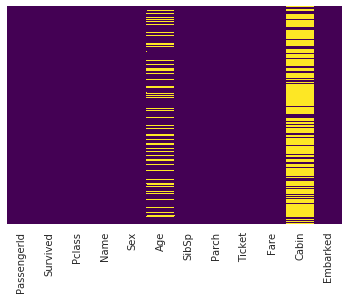

In [104]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

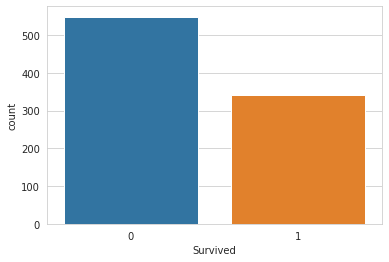

In [105]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

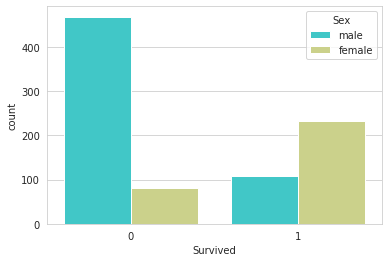

In [106]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'], hue=df['Sex'], palette='rainbow')

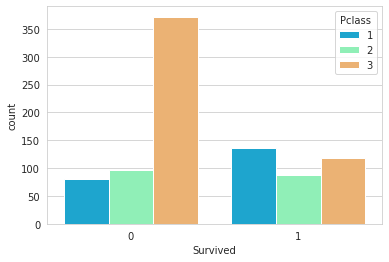

In [107]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'], hue=df['Pclass'], palette='rainbow')

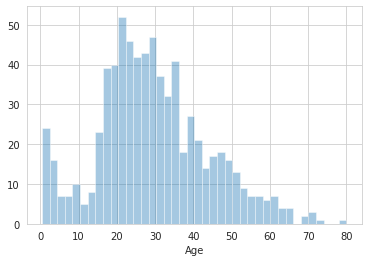

In [108]:
sns.distplot(df['Age'].dropna(), kde=False, bins=40)

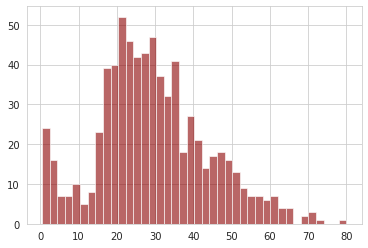

In [109]:
df['Age'].dropna().hist(bins=40, color='darkred', alpha=0.6)

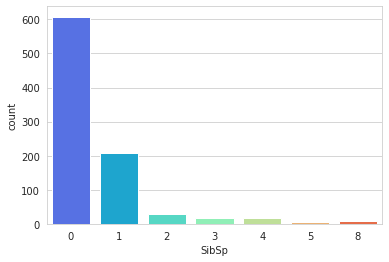

In [110]:
sns.set_style('whitegrid')
sns.countplot(df['SibSp'], palette='rainbow')

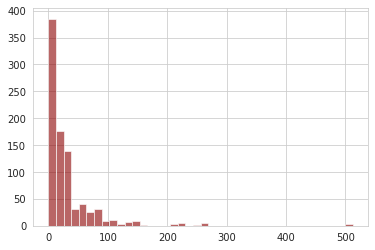

In [111]:
df['Fare'].dropna().hist(bins=40, color='darkred', alpha=0.6)

## Data Cleaning

In [112]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


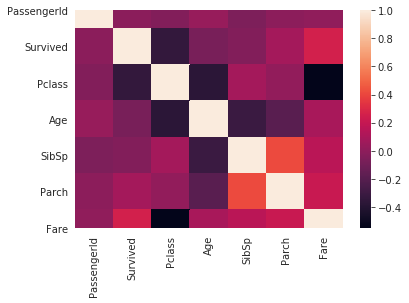

In [113]:
sns.heatmap(df.corr())

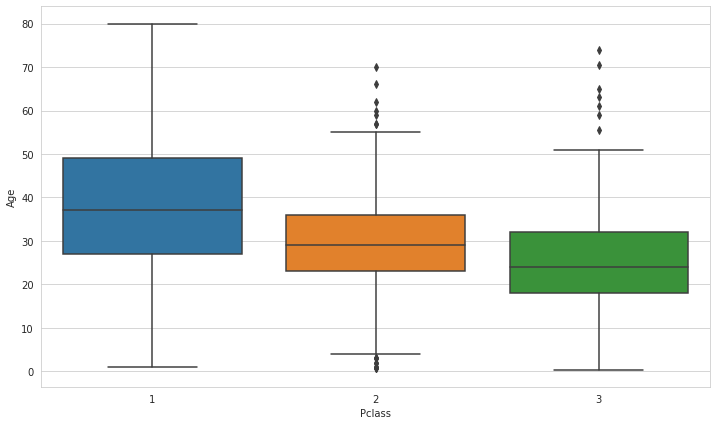

In [114]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['Pclass'], y = df['Age'])

In [115]:
def input_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Agegiven_train

In [116]:
df['Age'] = df[['Age', 'Pclass']].apply(input_age, axis=1)

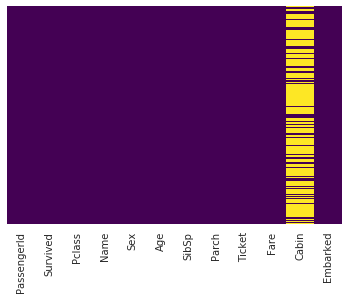

In [117]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [118]:
df.drop('Cabin', axis=1, inplace=True)

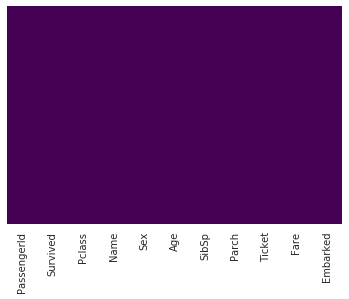

In [119]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


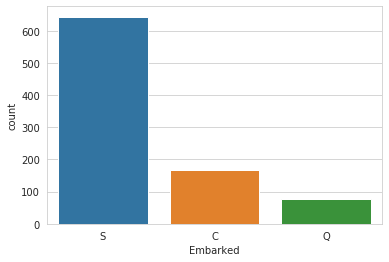

In [121]:
sns.countplot(df['Embarked'])

## combining both train and test for Feature engnn.

In [176]:
y = orgnl_train['Survived']

In [177]:

orgnl_train.drop(['Survived', 'PassengerId'], axis=1, inplace=True)

In [178]:
Pid = orgnl_test['PassengerId']

In [179]:
orgnl_test.drop('PassengerId', axis=1, inplace=True)

In [180]:
# orgnl_train['SalePrice'] = 0
print("The shape of given test data is: ", orgnl_train.shape)
print("The shape of given test data is: ", orgnl_test.shape)

The shape of given test data is:  (891, 10)
The shape of given test data is:  (418, 10)


In [181]:
orgnl_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
full_df_feature_eng = pd.concat([orgnl_train, orgnl_test], axis=0,sort=False)
print("The shape of dataset after combining both test and train dataset is: ",full_df_feature_eng.shape)

The shape of dataset after combining both test and train dataset is:  (1309, 10)


In [183]:
pd.get_dummies(full_df_feature_eng['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [184]:
sex = pd.get_dummies(full_df_feature_eng['Sex'], drop_first=True)
embark = pd.get_dummies(full_df_feature_eng['Embarked'], drop_first=True)

In [185]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [186]:
full_df_feature_eng.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [187]:
full_df_feature_eng

,Pclass,Age,SibSp,Parch,Fare,Cabin
0,3,22.0,1,0,7.2500,NaN
1,1,38.0,1,0,71.2833,C85
2,3,26.0,0,0,7.9250,NaN
3,1,35.0,1,0,53.1000,C123
4,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,C105
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [188]:
full_df_feature_eng = pd.concat([full_df_feature_eng, sex, embark], axis =1)

In [189]:
full_df_feature_eng.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,22.0,1,0,7.2500,NaN,1,0,1
1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,26.0,0,0,7.9250,NaN,0,0,1
3,1,35.0,1,0,53.1000,C123,0,0,1
4,3,35.0,0,0,8.0500,NaN,1,0,1


In [190]:
full_df_feature_eng.drop('Cabin', axis=1, inplace=True)

In [191]:
full_df_feature_eng.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


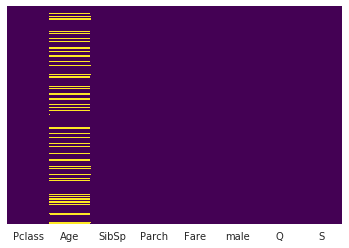

In [192]:
sns.heatmap(full_df_feature_eng.isnull(), yticklabels=False, cbar=False, cmap='viridis')

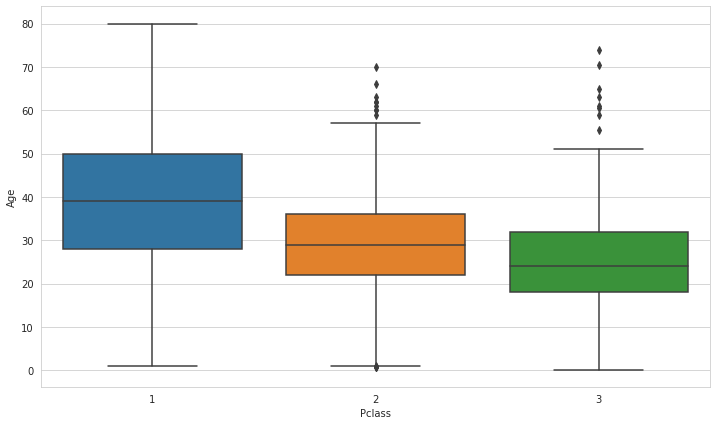

In [193]:
plt.figure(figsize=(12,7))
sns.boxplot(x=full_df_feature_eng['Pclass'], y = full_df_feature_eng['Age'])

In [194]:
def input_age_final(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        
        if Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [195]:
full_df_feature_eng['Age'] = full_df_feature_eng[['Age', 'Pclass']].apply(input_age_final, axis=1)

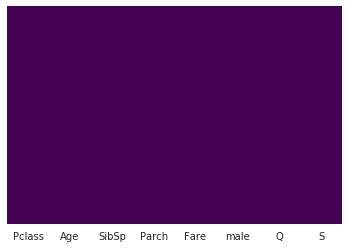

In [196]:
sns.heatmap(full_df_feature_eng.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_full_df_feature_eng= scaler.fit_transform(full_df_feature_eng)
# scaled_full_df_feature_eng.head()

In [198]:
len(full_df_feature_eng)

1309

In [199]:
scaled_full_df_feature_eng = pd.DataFrame(scaled_full_df_feature_eng, columns= full_df_feature_eng.columns[:])
scaled_full_df_feature_eng

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.841916,-0.547380,0.481288,-0.445000,-0.503402,0.743497,-0.32204,0.657394
1,-1.546098,0.667747,0.481288,-0.445000,0.734222,-1.344995,-0.32204,-1.521159
2,0.841916,-0.243598,-0.479087,-0.445000,-0.490356,-1.344995,-0.32204,0.657394
3,-1.546098,0.439911,0.481288,-0.445000,0.382778,-1.344995,-0.32204,0.657394
4,0.841916,0.439911,-0.479087,-0.445000,-0.487940,0.743497,-0.32204,0.657394
...,...,...,...,...,...,...,...,...
1304,0.841916,-0.395489,-0.479087,-0.445000,-0.487940,0.743497,-0.32204,0.657394
1305,-1.546098,0.743693,-0.479087,-0.445000,1.461271,-1.344995,-0.32204,-1.521159
1306,0.841916,0.705720,-0.479087,-0.445000,-0.503402,0.743497,-0.32204,0.657394
1307,0.841916,-0.395489,-0.479087,-0.445000,-0.487940,0.743497,-0.32204,0.657394


In [200]:
scaled_full_df_feature_eng.shape

(1309, 8)

In [201]:
given_train = scaled_full_df_feature_eng[0:891]
given_test = scaled_full_df_feature_eng[891:]

In [202]:
given_train.shape

(891, 8)

In [203]:
given_test.shape

(418, 8)

## Logistic Regression

In [235]:
# # y = df['Survived']
# print(y.head())
# print(y.shape)
new_final = pd.concat([given_train, target['Survived']], axis=1)
# final_train = pd.DataFrame({
#         "target": y,
#         "target": y
#     })

In [236]:
# df.drop('Survived', axis=1, inplace=True)
new_final

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,0.841916,-0.547380,0.481288,-0.445000,-0.503402,0.743497,-0.322040,0.657394,0
1,-1.546098,0.667747,0.481288,-0.445000,0.734222,-1.344995,-0.322040,-1.521159,1
2,0.841916,-0.243598,-0.479087,-0.445000,-0.490356,-1.344995,-0.322040,0.657394,1
3,-1.546098,0.439911,0.481288,-0.445000,0.382778,-1.344995,-0.322040,0.657394,1
4,0.841916,0.439911,-0.479087,-0.445000,-0.487940,0.743497,-0.322040,0.657394,0
...,...,...,...,...,...,...,...,...,...
886,-0.352091,-0.167653,-0.479087,-0.445000,-0.392267,0.743497,-0.322040,0.657394,0
887,-1.546098,-0.775216,-0.479087,-0.445000,-0.063694,-1.344995,-0.322040,0.657394,1
888,0.841916,-0.395489,0.481288,1.866526,-0.190292,-1.344995,-0.322040,0.657394,0
889,-1.546098,-0.243598,-0.479087,-0.445000,-0.063694,0.743497,-0.322040,-1.521159,1


In [237]:
# given_train.head()

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


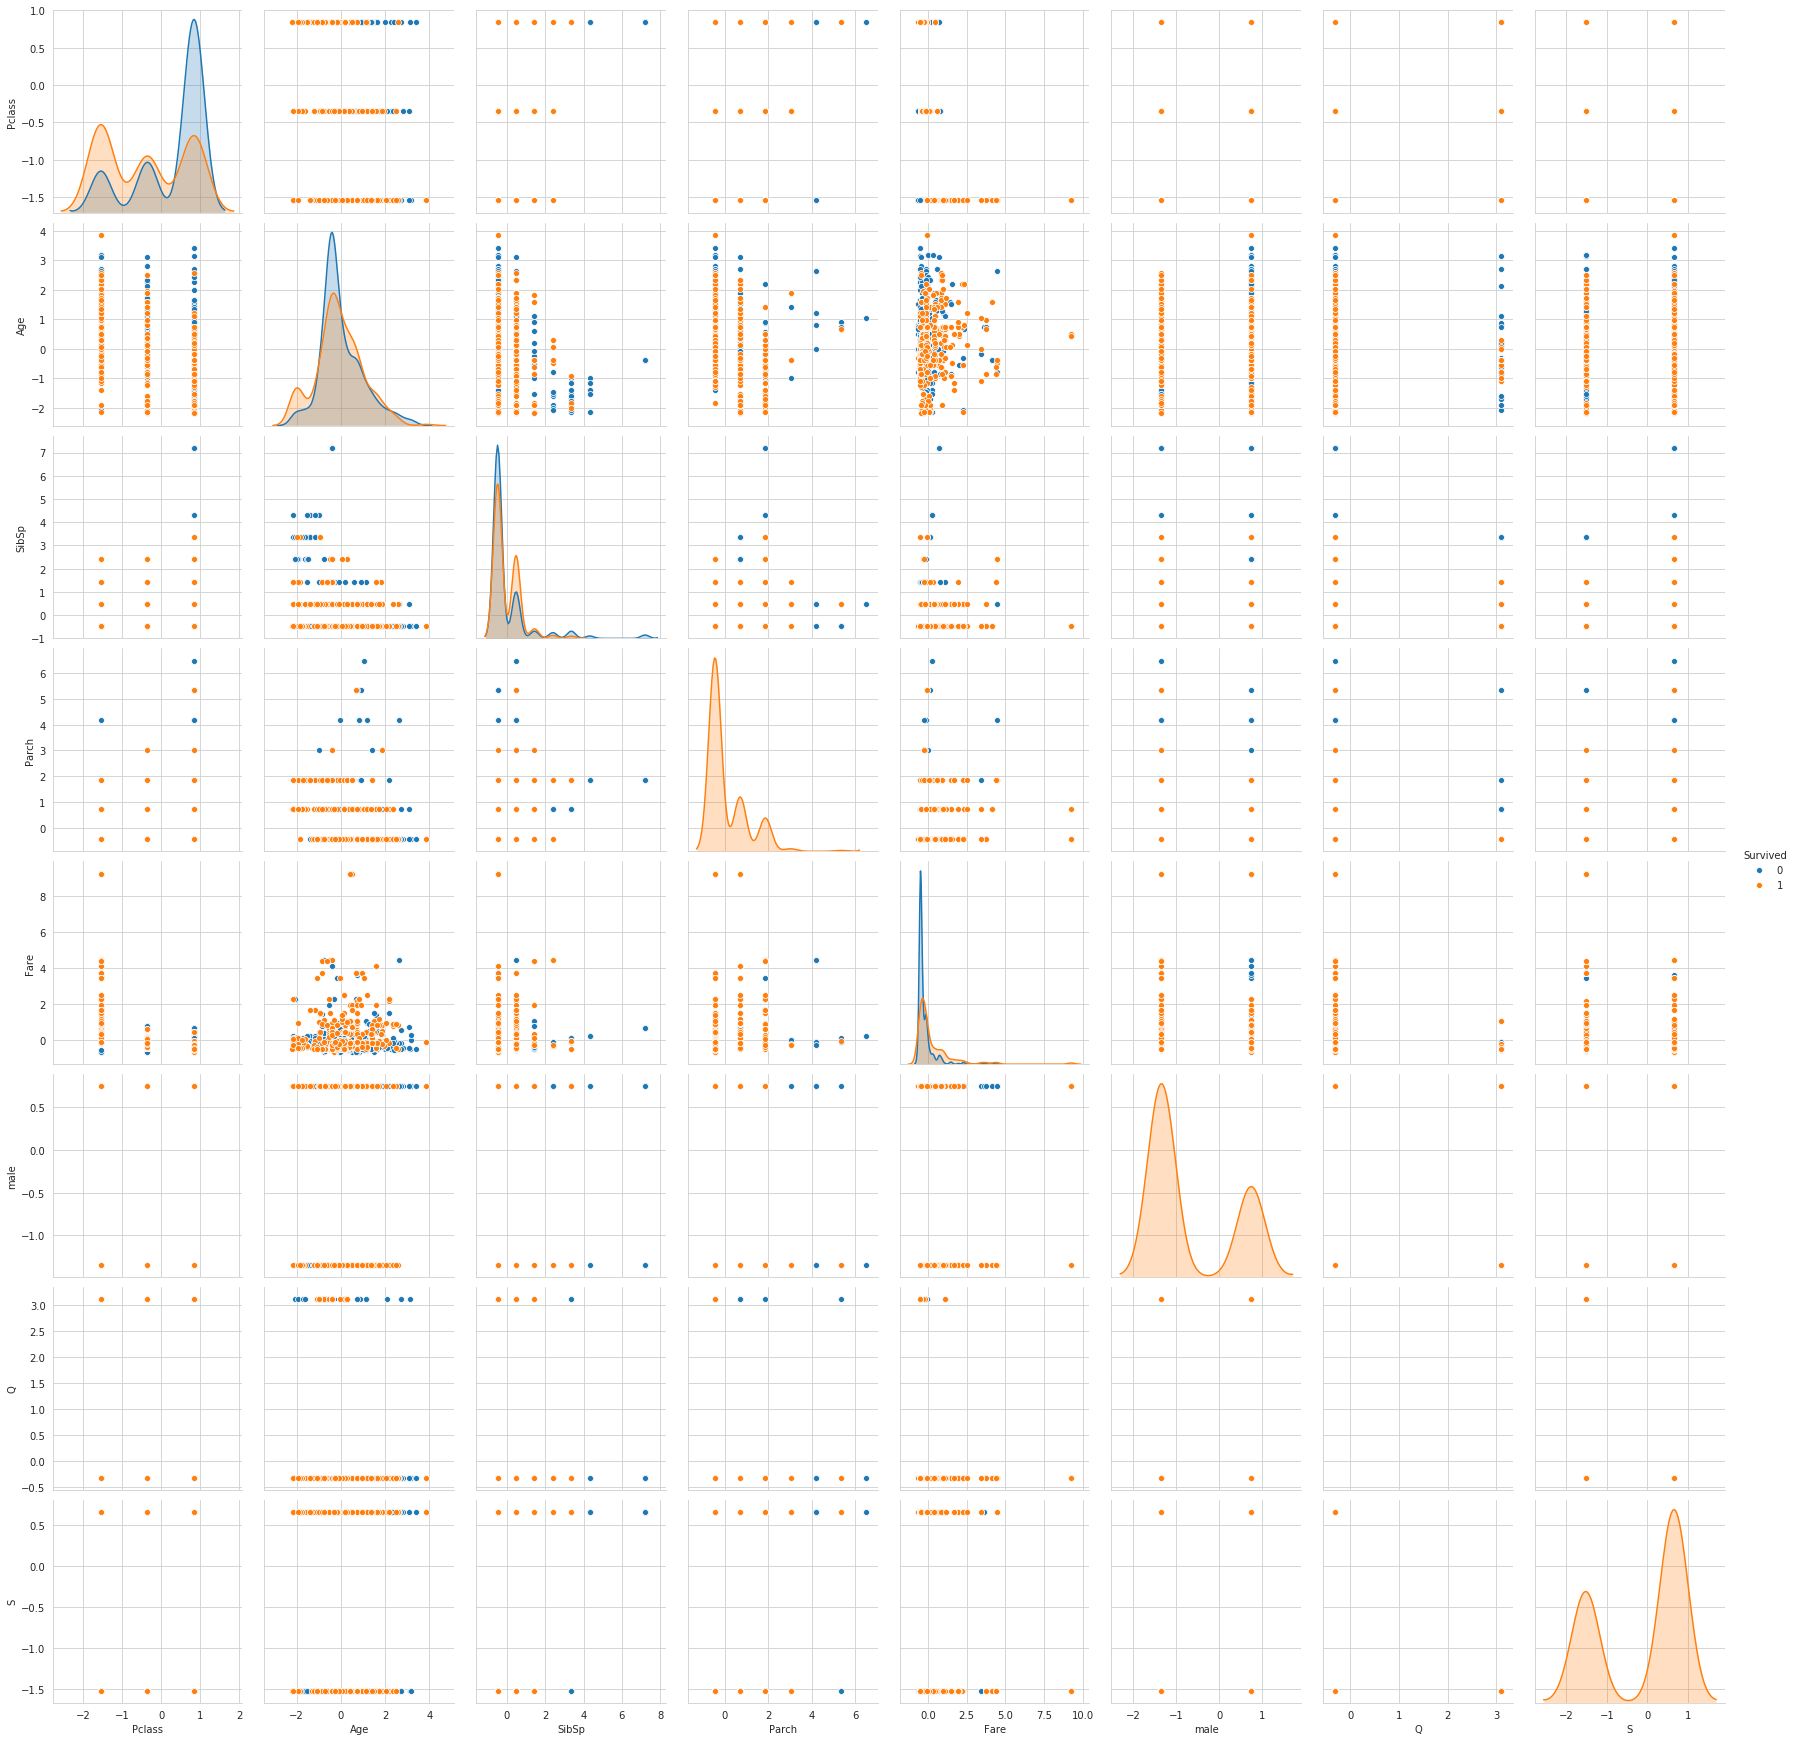

In [240]:
# x = given_train
# x.head()
sns.pairplot(new_final, hue='Survived', height = 3)

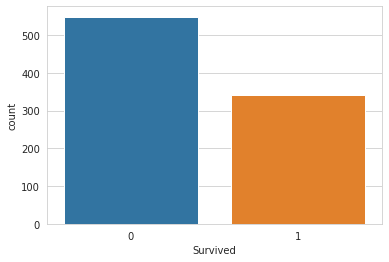

In [254]:
# target['Survived']
sns.countplot(new_final['Survived'])
# .val_count

In [301]:
from sklearn.model_selection import train_test_split,  cross_val_score
x_train, x_test, y_train, y_test = train_test_split(new_final.iloc[:, :-1], new_final['Survived'], test_size=0.3 ,random_state = 0)

In [302]:
from sklearn.neighbors import KNeighborsClassifier

In [314]:
knn = KNeighborsClassifier(n_neighbors=17)

In [315]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [316]:
pred = knn.predict(x_test)

In [317]:
print(x_train.shape)
print(x_test.shape)
print(given_test.shape)

(623, 8)
(268, 8)
(418, 8)


In [318]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [319]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [320]:
confusion_matrix(y_test, pred)

array([[157,  11],
       [ 33,  67]])

In [321]:
r2_score(y_test, pred)

0.2980952380952381

In [322]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       168
           1       0.86      0.67      0.75       100

    accuracy                           0.84       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.84      0.84      0.83       268



In [323]:
error_rate=[]

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

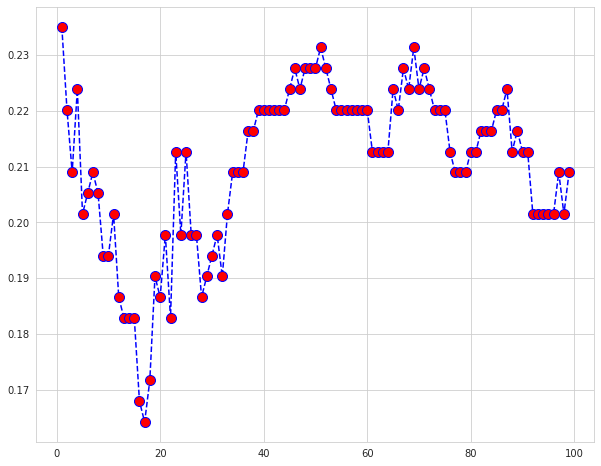

In [324]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rate,color='blue',markerfacecolor='red', markersize=10, marker='o', linestyle='dashed' )

In [325]:
given_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
891,0.841916,0.401938,-0.479087,-0.445000,-0.492208,0.743497,3.105202,-1.521159
892,0.841916,1.351256,0.481288,-0.445000,-0.508234,-1.344995,-0.322040,0.657394
893,-0.352091,2.490437,-0.479087,-0.445000,-0.456291,0.743497,3.105202,-1.521159
894,0.841916,-0.167653,-0.479087,-0.445000,-0.476102,0.743497,-0.322040,0.657394
895,0.841916,-0.547380,0.481288,0.710763,-0.406039,-1.344995,-0.322040,0.657394
...,...,...,...,...,...,...,...,...
1304,0.841916,-0.395489,-0.479087,-0.445000,-0.487940,0.743497,-0.322040,0.657394
1305,-1.546098,0.743693,-0.479087,-0.445000,1.461271,-1.344995,-0.322040,-1.521159
1306,0.841916,0.705720,-0.479087,-0.445000,-0.503402,0.743497,-0.322040,0.657394
1307,0.841916,-0.395489,-0.479087,-0.445000,-0.487940,0.743497,-0.322040,0.657394


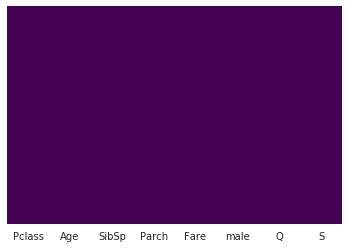

In [326]:
sns.heatmap(given_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [327]:
# pred = knn.predict(given_test)
np.any(np.isnan(given_test))

False

In [328]:
given_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [329]:
mean_fare = np.mean(given_test['Fare'])

In [330]:
given_test['Fare'].fillna(mean_fare, inplace =True)

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [331]:
given_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [332]:
np.any(np.isnan(given_test))

False

In [333]:
np.all(np.isfinite(given_test))

True

In [354]:
pred1 = knn.predict(given_test)

In [355]:
pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [356]:
final_res = pd.DataFrame({
        "PassengerId": df1['PassengerId'],
        "Survived": pred1
    })

In [357]:
final_res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [358]:
final_res.to_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/submission1.csv', index=False)

In [360]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
ytrain_pred = ada_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9013782866836302
Adaboost test roc-auc: 0.8400883838383839


In [368]:
pred2 = ada_classifier.predict(given_test)
pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [371]:
final_res = pd.DataFrame({
        "PassengerId": df1['PassengerId'],
        "Survived": pred2
    })
final_res.to_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/EDA_Titanic_Dataset/submission3.csv', index=False)

In [350]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [351]:
x_train, x_test ,y_train, y_test  = train_test_split(x, y, test_size=0.20, random_state=101 )

NameError: name 'x' is not defined

In [582]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [583]:
prediction = model.predict(x_test)

In [584]:
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(y_test, prediction))))          ## print the error 

RMSE = 0.422813138065352


In [585]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [586]:
con_mat = confusion_matrix(y_test, prediction)

In [587]:
con_mat

array([[88, 11],
       [21, 59]])

In [588]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8212290502793296

In [589]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.012, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [590]:
xgb.fit(x_train, y_train)

[22:34:36] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.012, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.6,
             reg_lambda=0.6, scale_pos_weight=1, silent=None, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=1)

In [591]:
xgb_prediction = xgb.predict(x_test)

In [592]:
# xgb_prediction

In [593]:
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(y_test, xgb_prediction))))          ## print the error 

RMSE = 0.3618406878147248


In [594]:
xgb_predict_on_provided_test_data = xgb.predict(given_test)
# xgb_predict_on_provided_test_data

In [595]:
antilog_of_prediction = np.exp(xgb_predict_on_provided_test_data)

In [596]:
antilog_of_prediction.mean()

1.554889

In [597]:
# antilog_of_prediction = np.exp(xgb_predict_on_provided_test_data).astype('uint8')
antilog_of_prediction = pd.DataFrame(antilog_of_prediction, columns=['val'])

In [543]:
antilog_of_prediction['val'].value_counts()

1.04    9
1.08    7
1.96    7
0.96    5
1.10    4
       ..
1.01    1
1.37    1
0.92    1
1.09    1
1.44    1
Name: val, Length: 374, dtype: int64

In [547]:
antilog_of_prediction['val']

0     1.16
1     1.38
2     1.26
3     1.26
4     1.44
      ... 
413   1.08
414   2.55
415   0.93
416   1.08
417   1.52
Name: val, Length: 418, dtype: float32

In [556]:
antilog_of_prediction.iloc[0:1]

,val
0,1.16


In [ ]:
for i in range(0, 417):
    if antilog_of_prediction.iloc[i:1+1] > 1.5549788:
        antilog_of_prediction.iloc[i:1+1] 

In [560]:
antilog_of_prediction.loc[antilog_of_prediction['val'] <= 1.5549788, 'val'] = 0
antilog_of_prediction.loc[antilog_of_prediction['val'] > 1.5549788, 'val'] = 1


In [562]:
antilog_of_prediction.astype('uint8')

,val
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [564]:
final_prediction = pd.DataFrame({
        "PassengerId": Pid,
        "Survived": antilog_of_prediction['val']
    })

In [565]:
final_prediction

,PassengerId,Survived
0,892,0.00
1,893,0.00
2,894,0.00
3,895,0.00
4,896,0.00
...,...,...
413,1305,0.00
414,1306,1.00
415,1307,0.00
416,1308,0.00


In [566]:
final_prediction.to_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/submission.csv', index=False)

In [395]:
# accuracy = accuracy_score(y_test, xgb_prediction)
# accuracy

In [396]:
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=3,
                                       learning_rate=0.006, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4,   )

In [397]:
lgbm.fit(x_train, y_train,eval_metric='rmse')

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split',
              learning_rate=0.006, max_bin=200, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=12000, n_jobs=-1, num_leaves=3,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [398]:
lgbm_predict_sample = lgbm.predict(x_test)
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(y_test, lgbm_predict_sample))))       ## Print the error


RMSE = 0.3692193648731553


In [400]:
# accuracy = accuracy_score(y_test, lgbm_predict_sample)
# accuracy